In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pyro
import pyro.distributions as dist
from model_pyro import model

In [2]:
auto_guide = pyro.infer.autoguide.AutoNormal(model)
adam = pyro.optim.Adam({"lr": 0.02})  # Consider decreasing learning rate.
elbo = pyro.infer.Trace_ELBO()
svi = pyro.infer.SVI(model, auto_guide, adam, elbo)


In [3]:
count_data = torch.from_numpy(np.loadtxt("txtdata.txt"))

In [4]:
losses = []
for step in range(1000):  # Consider running for more steps.
    loss = svi.step(count_data)
    losses.append(loss)
    if step % 100 == 0:
        print("Elbo loss: {}".format(loss))
        print(model.lambda_1)

Elbo loss: 3321.6091625975514
Elbo loss: 1213.4761507894707
Elbo loss: 494.0391807430905
Elbo loss: 499.1619416856258
Elbo loss: 486.769880034938
Elbo loss: 499.9081190068426
Elbo loss: 503.725662212611
Elbo loss: 496.34974619320116
Elbo loss: 498.99416144479807
Elbo loss: 497.40168094367976


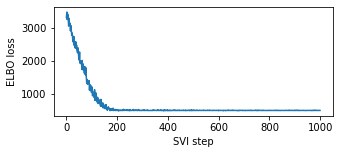

In [5]:
plt.figure(figsize=(5, 2))
plt.plot(losses)
plt.xlabel("SVI step")
plt.ylabel("ELBO loss");